Andrew Dodd, 3/6/21

## Assignment 2: Overview
### Part 1:
Four search algos:
1. randomized hill climbing
2. simulated annealing
3. a genetic algorithm
4. MIMIC

Three optimization problems:
1. 4 Peaks (GA)
2. K-color problem (MIMIC)
3. Count Ones (SA)

### Part 2:
Use neural net provided by mlrose, solve 
_________

In [1]:
import six
import sys
sys.modules['sklearn.externals.six'] = six
import mlrose
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from time import time
import random

# https://mlrose.readthedocs.io/en/stable/source/tutorial3.html#neural-networks

In [2]:
# Helper function for graph viz:
import networkx as nx 
   
  
# Defining a Class 
class GraphVisualization: 
   
    def __init__(self): 
          
        # visual is a list which stores all  
        # the set of edges that constitutes a 
        # graph 
        self.visual = [] 
          
    # addEdge function inputs the vertices of an 
    # edge and appends it to the visual list 
    def addEdge(self, a, b): 
        temp = [a, b] 
        self.visual.append(temp) 
          
    # In visualize function G is an object of 
    # class Graph given by networkx G.add_edges_from(visual) 
    # creates a graph with a given list 
    # nx.draw_networkx(G) - plots the graph 
    # plt.show() - displays the graph 
    def visualize(self): 
        G = nx.Graph() 
        G.add_edges_from(self.visual) 
        nx.draw_networkx(G) 
        plt.show() 

def visualize(edges):
    # Driver code 
    G = GraphVisualization() 
    for edge in edges:
        G.addEdge(*edge) 
    G.visualize() 

[[0, 1], [1, 2], [2, 3], [3, 4], [4, 5], [5, 6], [6, 7], [7, 8], [8, 9], [9, 10], [10, 11], [11, 12], [12, 13], [13, 14], [14, 15], [15, 16], [16, 17], [17, 18], [18, 19], [19, 20], [4, 20], [15, 18], [20, 14], [17, 10], [7, 5], [11, 0], [6, 16], [8, 3], [4, 7], [18, 7], [18, 9], [0, 14], [6, 5], [7, 19], [6, 19], [15, 10], [6, 1], [0, 15], [2, 5], [14, 5]]


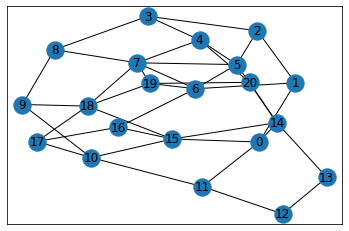

In [3]:
# Initialize fitness function object using state
def make_edges(n, extra=True):
    edges = []
    for i in range(n):
        edges.append([i, i+1])
    if extra:
        for i in range(int(max(1, n))):
            p1 = random.randint(0, n)
            p2 = random.randint(0, n)
            if p1 == p2: continue
            edges.append([p1, p2])
    return edges

edges = make_edges(20)
print(edges)
visualize(edges)

fitness = mlrose.MaxKColor(edges = edges)
problem_fit = mlrose.DiscreteOpt(length = 21, fitness_fn=fitness, maximize=False)

n_iters = list(range(1, 100))
n_mc = 20

In [170]:
ga_fitnesses = []
ga_pop_size = 20
for i in n_iters:
    ave = []
    for j in range(n_mc):
        best_state, best_fitness = mlrose.genetic_alg(problem_fit, pop_size=ga_pop_size, max_iters=i)
        ave.append(best_fitness)
    ga_fitnesses.append(sum(ave)/len(ave))

In [5]:
sa_fitnesses = []
sched = mlrose.GeomDecay(init_temp=1, decay=0.99, min_temp=0.001)
for i in n_iters:
    ave = []
    for j in range(n_mc):
        best_state, best_fitness = mlrose.simulated_annealing(problem_fit, schedule=sched, 
                                                              max_attempts=20, max_iters=i)
        ave.append(best_fitness)
    sa_fitnesses.append(sum(ave)/len(ave))

In [172]:
rhc_fitnesses = []
for i in n_iters:
    ave = []
    for j in range(n_mc):
        best_state, best_fitness = mlrose.random_hill_climb(problem_fit, max_iters = i, restarts=10)
        ave.append(best_fitness)
    rhc_fitnesses.append(sum(ave)/len(ave))

In [174]:
mimic_fitnesses = []
for i in range(7):
    ave = []
    for j in range(n_mc):
        best_state, best_fitness = mlrose.mimic(problem_fit, pop_size=200, max_iters = i)
        ave.append(best_fitness)
    mimic_fitnesses.append(sum(ave)/len(ave))
mimic_fitnesses.extend([mimic_fitnesses[-1]]*(len(n_iters)-7))
print(mimic_fitnesses)

[18.45, 9.35, 7.5, 6.55, 6.3, 6.3, 6.1, 6.1, 6.1, 6.1, 6.1, 6.1, 6.1, 6.1, 6.1, 6.1, 6.1, 6.1, 6.1, 6.1, 6.1, 6.1, 6.1, 6.1, 6.1, 6.1, 6.1, 6.1, 6.1, 6.1, 6.1, 6.1, 6.1, 6.1, 6.1, 6.1, 6.1, 6.1, 6.1, 6.1, 6.1, 6.1, 6.1, 6.1, 6.1, 6.1, 6.1, 6.1, 6.1, 6.1, 6.1, 6.1, 6.1, 6.1, 6.1, 6.1, 6.1, 6.1, 6.1, 6.1, 6.1, 6.1, 6.1, 6.1, 6.1, 6.1, 6.1, 6.1, 6.1, 6.1, 6.1, 6.1, 6.1, 6.1, 6.1, 6.1, 6.1, 6.1, 6.1, 6.1, 6.1, 6.1, 6.1, 6.1, 6.1, 6.1, 6.1, 6.1, 6.1, 6.1, 6.1, 6.1, 6.1, 6.1, 6.1, 6.1, 6.1, 6.1, 6.1]


In [89]:
print(len(mimic_fitnesses), len(rhc_fitnesses))

99 99


[Text(0.5, 0, 'Iteration'), Text(0, 0.5, 'Fitness')]

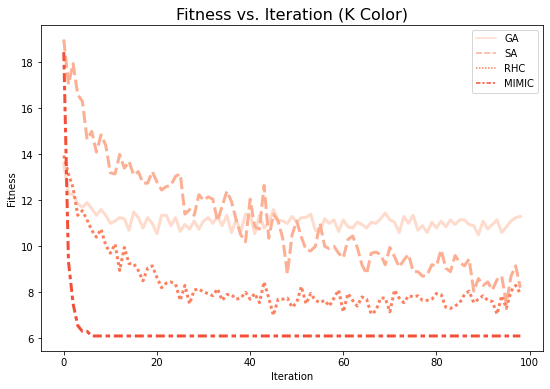

In [176]:
f, ax = plt.subplots(1,1, figsize=(9,6))
d = {'GA': ga_fitnesses,
     'SA': sa_fitnesses,
     'RHC': rhc_fitnesses,
     'MIMIC': mimic_fitnesses}
sns.lineplot(data=pd.DataFrame(d), linewidth = 3)
ax.set_title("Fitness vs. Iteration (K Color)", fontsize=16)
ax.set(xlabel='Iteration', ylabel='Fitness')

In [13]:
fitness = mlrose.MaxKColor(edges)

ga_times = []
sa_times = []
rhc_times = []
mimic_times = []

def get_time(problem_fit, algo, opt, sz, find_best=False):
    cnt = 0
    best_fitness = 100000
    tic = time()
    fn_evals = 0
    while best_fitness > opt:
        if algo == 'ga':
            best_state, best_fitness, curve = mlrose.genetic_alg(problem_fit, max_iters=10, curve=True)
            fn_evals = len(curve) * 200 * 5
        elif algo == 'mimic':
            best_state, best_fitness, curve = mlrose.mimic(problem_fit, pop_size=200, max_iters=3, curve=True)
            fn_evals = len(curve) * 50 * 5
        elif algo == 'rhc':
            best_state, best_fitness, curve = mlrose.random_hill_climb(problem_fit, max_iters = 5000, restarts=30, curve=True)
            fn_evals = len(curve) * sz * 5
        elif algo == 'sa':
            best_state, best_fitness, curve = mlrose.simulated_annealing(problem_fit, schedule=sched, max_iters=5000, curve=True)
            fn_evals = len(curve) * 5
        else:
            print("Failure")
        cnt += 1
        if find_best:
            print("Benchmark from MIMIC: ", best_fitness)
            return time() - tic, True, sz, fn_evals, best_fitness
        if (time() - tic > 180 and best_fitness > opt):
            return time() - tic, False, sz, fn_evals, best_fitness
    time_taken = time() - tic
    print(algo, int(best_fitness), round(time_taken,2))
    return time_taken, True, sz, fn_evals, best_fitness

# TODO change this to higher number if time allows
l1 = list(range(5,40,2))
print(l1)
for sz in l1:
    opt = 5
    print("~~~~~ Desired opt: ", opt, "Sz: ", sz)
    edges = make_edges(sz, extra=True)
    fitness = mlrose.MaxKColor(edges = edges)
    
    problem_fit = mlrose.DiscreteOpt(length=len(edges)+1, fitness_fn=fitness, maximize=False)
    opt = get_time(problem_fit=problem_fit, algo='mimic', opt=opt, sz=sz, find_best=True)[-1]
    
    if sz < 15:
        problem_fit = mlrose.DiscreteOpt(length=len(edges)+1, fitness_fn=fitness, maximize=False)
        ga_times.append(get_time(problem_fit=problem_fit, algo='ga', opt=opt, sz=sz))
    
    problem_fit = mlrose.DiscreteOpt(length=len(edges)+1, fitness_fn=fitness, maximize=False)
    mimic_times.append(get_time(problem_fit=problem_fit, algo='mimic', opt=opt, sz=sz))
    
    problem_fit = mlrose.DiscreteOpt(length=len(edges)+1, fitness_fn=fitness, maximize=False)
    sa_times.append(get_time(problem_fit=problem_fit, algo='sa', opt=opt, sz=sz))
    
    problem_fit = mlrose.DiscreteOpt(length=len(edges)+1, fitness_fn=fitness, maximize=False)
    rhc_times.append(get_time(problem_fit=problem_fit, algo='rhc', opt=opt, sz=sz))

[5, 7, 9, 11, 13, 15, 17, 19, 21, 23, 25, 27, 29, 31, 33, 35, 37, 39]
~~~~~ Desired opt:  5 Sz:  5
Benchmark from MIMIC:  2.0
ga 2 0.13
mimic 2 0.13
sa 2 0.12
rhc 2 0.01
~~~~~ Desired opt:  5 Sz:  7
Benchmark from MIMIC:  2.0
ga 2 0.13
mimic 2 0.16
sa 2 0.03
rhc 2 0.01
~~~~~ Desired opt:  5 Sz:  9
Benchmark from MIMIC:  3.0
ga 3 0.14
mimic 3 0.31
sa 3 0.04
rhc 3 0.01
~~~~~ Desired opt:  5 Sz:  11
Benchmark from MIMIC:  3.0
ga 3 0.14
mimic 3 0.45
sa 3 0.01
rhc 3 0.01
~~~~~ Desired opt:  5 Sz:  13
Benchmark from MIMIC:  3.0
ga 3 3.74
mimic 3 1.52
sa 3 0.05
rhc 3 0.03
~~~~~ Desired opt:  5 Sz:  15
Benchmark from MIMIC:  5.0
mimic 3 0.9
sa 3 0.05
rhc 4 0.02
~~~~~ Desired opt:  5 Sz:  17
Benchmark from MIMIC:  6.0
mimic 6 1.26
sa 6 0.18
rhc 6 0.14
~~~~~ Desired opt:  5 Sz:  19
Benchmark from MIMIC:  8.0
mimic 7 1.49
sa 6 0.05
rhc 7 0.02
~~~~~ Desired opt:  5 Sz:  21
Benchmark from MIMIC:  9.0
mimic 9 1.9
sa 7 0.15
rhc 9 0.04
~~~~~ Desired opt:  5 Sz:  23


/Users/andrewpersonal/opt/anaconda3/lib/python3.8/site-packages/mlrose/algorithms.py:311: RuntimeWarning: overflow encountered in exp
  prob = np.exp(delta_e/temp)


Benchmark from MIMIC:  8.0
mimic 7 4.28
sa 5 0.04
rhc 8 0.02
~~~~~ Desired opt:  5 Sz:  25
Benchmark from MIMIC:  10.0
mimic 10 2.55
sa 8 0.25
rhc 10 0.13
~~~~~ Desired opt:  5 Sz:  27
Benchmark from MIMIC:  10.0
mimic 9 2.68
sa 6 0.07
rhc 10 0.11
~~~~~ Desired opt:  5 Sz:  29


/Users/andrewpersonal/opt/anaconda3/lib/python3.8/site-packages/mlrose/algorithms.py:311: RuntimeWarning: overflow encountered in exp
  prob = np.exp(delta_e/temp)


Benchmark from MIMIC:  14.0
mimic 13 3.51
sa 12 0.24
rhc 14 0.03
~~~~~ Desired opt:  5 Sz:  31
Benchmark from MIMIC:  17.0
mimic 16 4.01
sa 12 0.08
rhc 17 0.03
~~~~~ Desired opt:  5 Sz:  33
Benchmark from MIMIC:  17.0
mimic 16 4.57
sa 14 0.05
rhc 17 0.15
~~~~~ Desired opt:  5 Sz:  35
Benchmark from MIMIC:  18.0
mimic 18 5.05
sa 10 0.22
rhc 18 0.06
~~~~~ Desired opt:  5 Sz:  37


KeyboardInterrupt: 

In [14]:
ga = pd.DataFrame(ga_times, columns = ['time', 'found', 'size','fn_evals','best_fitness'])
sa = pd.DataFrame(sa_times, columns = ['time', 'found', 'size','fn_evals','best_fitness'])
rhc = pd.DataFrame(rhc_times, columns = ['time', 'found', 'size','fn_evals','best_fitness'])
mimic = pd.DataFrame(mimic_times, columns = ['time', 'found', 'size','fn_evals','best_fitness'])
concatenated = pd.concat([ga.assign(dataset='ga'), 
                          sa.assign(dataset='sa'),
                          rhc.assign(dataset='rhc'),
                          mimic.assign(dataset='mimic'),
                         ])
concatenated = concatenated.rename(columns={'dataset':'algo'})
concatenated['fn_evals']/=1000
# concatenated = concatenated[concatenated.found==True]

[Text(0.5, 0, 'Problem Size'),
 Text(0, 0.5, 'Thousands of Function Evals. (Approx.)')]

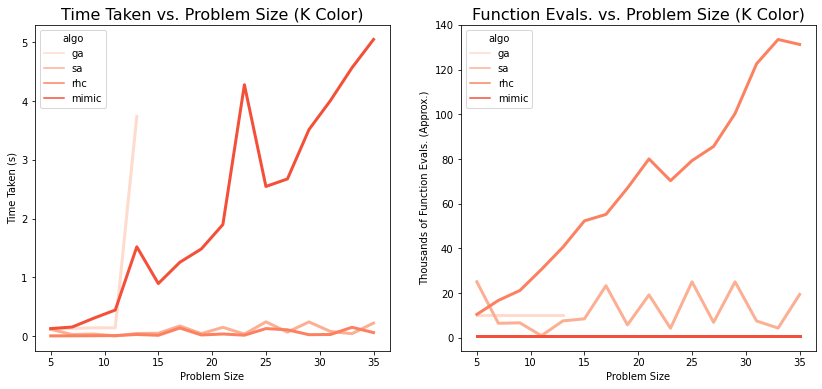

In [15]:
f, ax = plt.subplots(1,2, figsize=(14,6))
sns.set_palette("Reds")
sns.lineplot(x = 'size', y='time', hue='algo', data=pd.DataFrame(concatenated), ax=ax[0], linewidth = 3)
ax[0].set_title("Time Taken vs. Problem Size (K Color)", fontsize=16)
ax[0].set(xlabel='Problem Size', ylabel='Time Taken (s)')

sns.lineplot(x = 'size', y='fn_evals', hue='algo', data=pd.DataFrame(concatenated), ax=ax[1], linewidth = 3)
ax[1].set_title("Function Evals. vs. Problem Size (K Color)", fontsize=16)
ax[1].set(xlabel='Problem Size', ylabel='Thousands of Function Evals. (Approx.)')

### Scratch Area

In [23]:
edges = make_edges(100, extra=False)
fitness = mlrose.MaxKColor(edges = edges)
problem_fit = mlrose.DiscreteOpt(length=101, fitness_fn=fitness, maximize=False)
best_state, best_fitness, curve = mlrose.simulated_annealing(problem_fit, schedule=sched, max_iters=50000000, curve=True)
print(best_fitness)
print(best_state)

problem_fit = mlrose.DiscreteOpt(length=101, fitness_fn=fitness, maximize=False)''
best_state, best_fitness, curve = mlrose.mimic(problem_fit, pop_size=200, max_iters=6, curve=True)
visualize(edges)
print(best_fitness)
print(best_state)

17.0
[1 0 1 0 1 1 0 1 0 1 1 1 0 1 1 0 0 0 1 0 0 1 1 0 1 0 1 0 1 0 1 0 1 0 1 1 1
 0 1 0 1 0 0 1 0 1 0 1 0 1 0 1 1 0 1 1 0 1 0 1 1 0 0 1 0 1 0 1 0 0 1 0 1 0
 1 0 1 0 1 0 1 0 1 0 1 0 1 0 0 1 0 1 0 1 0 1 0 1 0 1 0]


KeyboardInterrupt: 